In [15]:
from keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import matplotlib.pyplot as plt

In [16]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_train=preprocess_input(X_train)
X_test=preprocess_input(X_test)

In [21]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

TypeError: Invalid shape (3,) for image data

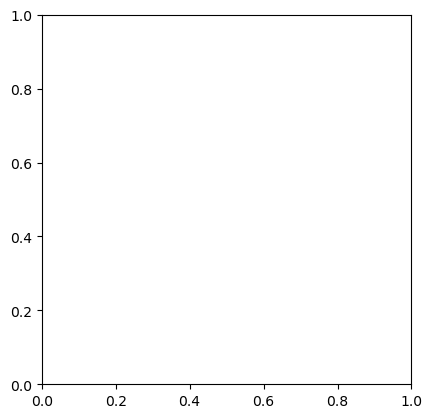

In [24]:
plt.imshow(X_train[0].shape)
plt.show()

In [26]:
base_model=VGG16(include_top=False,
                weights='imagenet',
                input_shape=X_train[0].shape)

In [27]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [28]:
base_model.trainable=False

In [31]:
model=Sequential()
model.add(Input(shape=(1024)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              1025000   
                                                                 
 dense_5 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,037,010
Trainable params: 3,037,010
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [34]:
model.fit(X_train,y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5


ValueError: in user code:

    File "D:\DS Python\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "D:\DS Python\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\DS Python\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "D:\DS Python\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "D:\DS Python\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\DS Python\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 1024), found shape=(None, 32, 32, 3)
